# Import Libraries

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Statistical tests
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch import arch_model

# Import Data

In [10]:
url = "https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/fts3/m-intc7308.txt"
data = pd.read_csv(url, sep='\s+', header=0)  # Whitespace-separated file

# Inspect the first few rows and columns
print(data.head())
print(data.columns)

# Convert 'date' column to datetime (YYYYMMDD format)
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

# Verify
print(data.head())

       date       rtn
0  19730131  0.010050
1  19730228 -0.139303
2  19730330  0.069364
3  19730430  0.086486
4  19730531 -0.104478
Index(['date', 'rtn'], dtype='object')
        date       rtn
0 1973-01-31  0.010050
1 1973-02-28 -0.139303
2 1973-03-30  0.069364
3 1973-04-30  0.086486
4 1973-05-31 -0.104478


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3584689680.py:2: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(url, sep='\s+', header=0)  # Whitespace-separated file


# Plot Returns

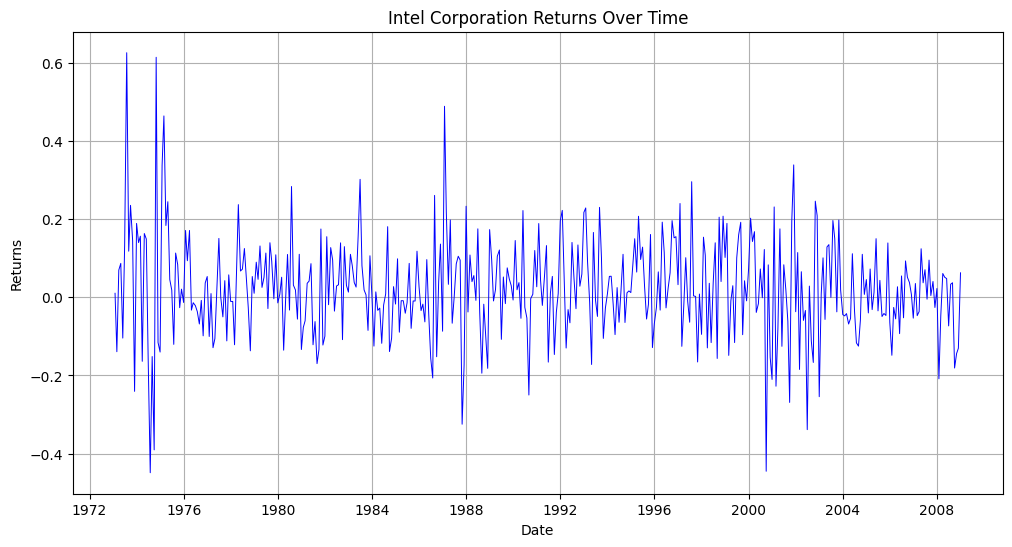

In [11]:
# Step 6: Plot Intel returns over time
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['rtn'], color='blue', linewidth=0.7)
plt.title("Intel Corporation Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.grid(True)
plt.show()

# Test for ARCH

In [12]:
# Ljung-Box test up to lag 12
ljung_box_result = acorr_ljungbox(data['rtn'], lags=[12], return_df=True)
print("Ljung-Box test on returns (lag 12):")
print(ljung_box_result)

Ljung-Box test on returns (lag 12):
      lb_stat  lb_pvalue
12  16.319216   0.177049


In [14]:
# Demean the returns
demeaned_returns = data['rtn'] - np.mean(data['rtn'])

# Square the demeaned returns
squared_demeaned = demeaned_returns**2

# Ljung-Box test on squared demeaned returns (lag 12)
ljung_box_squared = acorr_ljungbox(squared_demeaned, lags=[12], return_df=True)
print("Ljung-Box test on squared demeaned returns (lag 12):")
print(ljung_box_squared)

Ljung-Box test on squared demeaned returns (lag 12):
      lb_stat     lb_pvalue
12  86.606796  2.233000e-13


In [18]:
# Optional: rescale to avoid DataScaleWarning
demeaned_returns_scaled = demeaned_returns * 10

# Step 2: Fit an ARCH(12) model on the demeaned (and scaled) returns
arch_test = arch_model(demeaned_returns_scaled, vol='ARCH', p=12, o=0, q=0, dist='normal')
arch_fit = arch_test.fit(disp='off')

# Step 3: Print the model summary
print(arch_fit.summary())

# Step 4: Perform ARCH LM test
arch_lm = arch_fit.arch_lm_test()

# Step 5: Extract and print test statistic and p-value
print("ARCH LM Test Statistic:", arch_lm.stat)
print("ARCH LM Test p-value:", arch_lm.pval)


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                    rtn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -687.946
Distribution:                  Normal   AIC:                           1403.89
Method:            Maximum Likelihood   BIC:                           1460.85
                                        No. Observations:                  432
Date:                Sat, Sep 27 2025   Df Residuals:                      431
Time:                        17:28:11   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0418  6.036e-02     -0.693      0.488 [ -0.160,